In [28]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import colors
from matplotlib.ticker import PercentFormatter
# regression analysis


import sys
import os
from pathlib import Path

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")

from players_season_builder import *


Summary - Describing the data we have

Players >24 mins:
 - histogram - minutes played across starters by season
 - 



In [93]:
player_path = r"\Users\sebas\Desktop\UChicago - Q6\Sports Analytics\sports_analytics_project\data\BDB_Player.xlsx"

df_player = pd.read_excel(player_path)

# I hate this
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2006-2007 Regular Season',
    '06-07'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2007-2008 Regular Season',
    '07-08'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2008-2009 Regular Season',
    '08-09'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2009-2010 Regular Season',
    '09-10'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2010-2011 Regular Season',
    '10-11'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2011-2012 Regular Season',
    '11-12'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2012-2013 Regular Season',
    '12-13'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2013-2014 Regular Season',
    '13-14'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2014-2015 Regular Season',
    '14-15'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2015-2016 Regular Season',
    '15-16'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2016-2017 Regular Season',
    '16-17'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2017-2018 Regular Season',
    '17-18'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2018-2019 Regular Season',
    '18-19'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2019-2020 Regular Season',
    '19-20'
)

In [94]:
df_hist_minutes = df_player.groupby(['DATASET','PLAYER FULL NAME'])['MIN'].mean().reset_index()
df_hist_sum = df_player.groupby(['DATASET'])['MIN','PER'].agg(
    [np.mean, np.std, np.var, np.median]
)

# df_hist_minutes.columns = ['_'.join(col) for col in df_hist_minutes.columns]
df_hist_sum.columns = ['_'.join(col) for col in df_hist_sum.columns]
df_hist_sum = df_hist_sum.reset_index()
df_hist_sum.head()


<ipython-input-94-ccaa1358f6a4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_hist_sum = df_player.groupby(['DATASET'])['MIN','PER'].agg(


,DATASET,MIN_mean,MIN_std,MIN_var,MIN_median,PER_mean,PER_std,PER_var,PER_median
0,06-07,33.941181,6.084182,37.017276,33.67,11.760323,7.617634,58.028344,10.964939
1,07-08,33.755104,6.021470,36.258104,33.50,11.984202,7.546096,56.943558,11.307648
2,08-09,33.701123,5.800798,33.649252,33.60,11.824978,7.527878,56.668941,11.155681
3,09-10,33.419449,5.826445,33.947456,33.07,11.743035,7.437564,55.317362,11.061349
4,10-11,33.151134,5.665681,32.099942,32.83,11.653147,7.380054,54.465199,11.052318


No handles with labels found to put in legend.


<Figure size 14400x504 with 0 Axes>

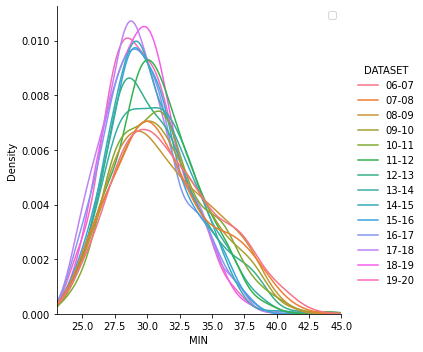

In [97]:
# Density of minutes played by season

plt.figure(figsize=(200, 7))
# for season in unique_seasons:
sns.displot(
  data = df_hist_minutes, x = 'MIN', hue='DATASET', kind="kde"
  #df_hist_min.loc[df_hist_min['DATASET'] == season, 'MIN'], label = season, kde=True
)

plt.xlim(23,45)
plt.legend()


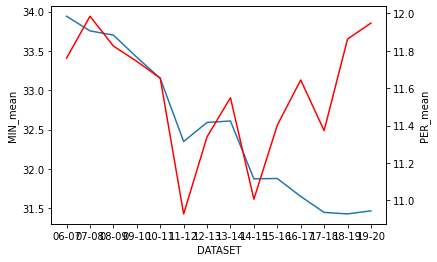

In [121]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.lineplot(data = df_hist_sum, x='DATASET', y='MIN_mean', markers=True, ax = ax1)
# sns.lineplot(data = df_hist_sum, x='DATASET', ax = ax1, y='MIN_median')
# sns.lineplot(data = df_hist_sum, x='DATASET', ax = ax1, y='MIN_var')
#sns.lineplot(data = df_hist_sum, x='DATASET', ax = ax1, y='MIN_std')
sns.lineplot(data = df_hist_sum, x='DATASET', y='PER_mean', markers=True, dashes=True, color='red', ax = ax2)
plt.show()

In [63]:
# PER 
# 

sns.lineplot(data = df_hist_sum,
) 

DATASET        MIN                                    PER  \
                                  mean       std        var median       mean   
0  2006-2007 Regular Season  33.941181  6.084182  37.017276  33.67  11.760323   
1  2007-2008 Regular Season  33.755104  6.021470  36.258104  33.50  11.984202   
2  2008-2009 Regular Season  33.701123  5.800798  33.649252  33.60  11.824978   
3  2009-2010 Regular Season  33.419449  5.826445  33.947456  33.07  11.743035   
4  2010-2011 Regular Season  33.151134  5.665681  32.099942  32.83  11.653147   

                                   
        std        var     median  
0  7.617634  58.028344  10.964939  
1  7.546096  56.943558  11.307648  
2  7.527878  56.668941  11.155681  
3  7.437564  55.317362  11.061349  
4  7.380054  54.465199  11.052318

For the independent variables, we have:
    Player Quality – Estimated as being the constant in the regression model
    Home Court Advantage – A binary variable that indicates if the player is at home or on the road
    Opp. Quality – The opponent’s quality will be estimated by 2 variables: its offensive and its defensive efficiency (points allowed/scored per 100 possessions)
    Rest Level – To estimate a player’s rest level, we create variables to reflect the activity for the past 3 days. There are two approaches for these variables:
    Minutes – There are 3 variables (non-dummy) that reflect how many minutes the player was on court for each of the past 3 days
    Days-off – The variables reflect if the player entered a game, no matter how much he played (e.g., the dummy “011”, means that the team has played 2 and 3 days ago, and has not played yesterday)

This results in the following regression model (using the “minutes” approach for rest level):

    PER= α + C * H + ( C * OO + C * OD ) + ( C * M1 + C * M2 + C * M3 ) + err

Where:
    PER = Player Efficiency Rating (for the game)
    α = Constant (that can be interpreted as a player’s baseline performance)
    H = Binary variable that is 1 if the player is playing at home, and 0 if he is playing on the road
    OO = Opponent’s offensive efficiency during the season
    OD = Opponent’s team defensive efficiency during the season
    M1/M2/M3 = Number of minutes the player has played 1, 2, and 3 days before the game
